(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

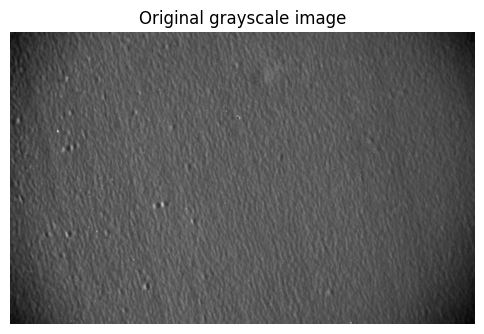

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image = '/content/1.png'
# Read as a grayscale image
img = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

# show the original image
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original grayscale image')
plt.axis('off')

Application of Top-hat Transformation

(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

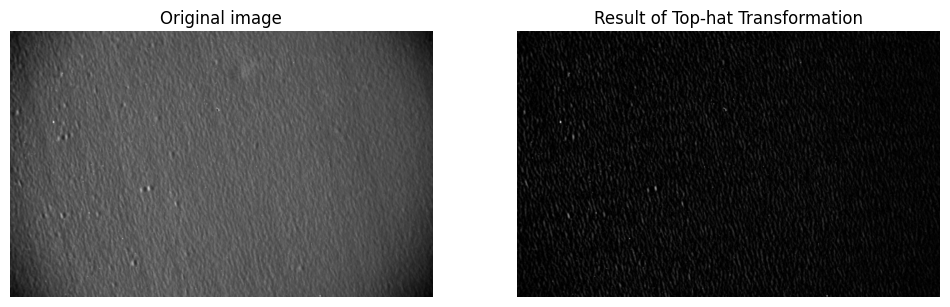

In [2]:
# Define structural elements
kernel_size = 15  # Adjustable according to the size of the protrusion
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Apply the top hat transformation
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# visualize the results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(tophat, cmap='gray')
plt.title('Result of Top-hat Transformation')
plt.axis('off')


Perform threshold segmentation on the results to obtain a binary protruding area.

(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

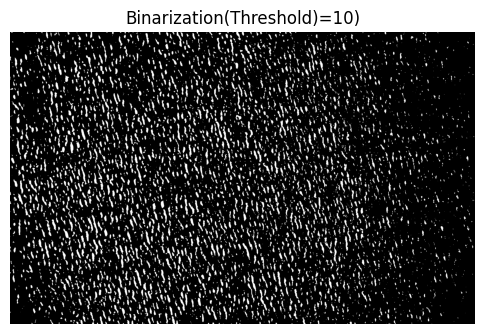

In [3]:
# Binarization parameters
thresh_val = 10  # adjustable
_, binary = cv2.threshold(tophat, thresh_val, 255, cv2.THRESH_BINARY)

# visualize the results
plt.figure(figsize=(6,6))
plt.imshow(binary, cmap='gray')
plt.title(f'Binarization(Threshold)={thresh_val})')
plt.axis('off')


Use connected component analysis to extract the properties of each convex region.

(np.float64(-0.5), np.float64(1935.5), np.float64(1215.5), np.float64(-0.5))

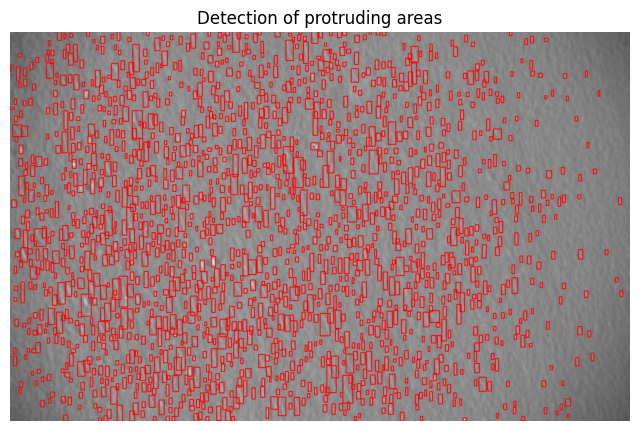

In [4]:
# Connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

# Draw detection contour
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 50:  # Filter out small noise
        cv2.rectangle(output, (x,y), (x+w, y+h), (0,0,255), 2)

plt.figure(figsize=(8,8))
plt.imshow(output[...,::-1])  # BGR->RGB
plt.title('Detection of protruding areas')
plt.axis('off')

In [5]:
#output path
base, _ = os.path.splitext(input_image)
cv2.imwrite(base + '_tophat.png', tophat)
cv2.imwrite(base + '_binary.png', binary)
cv2.imwrite(base + '_detected.png', output)
print("File saved：", base + '_tophat.png', base + '_binary.png', base + '_detected.png')

File saved： /content/1_tophat.png /content/1_binary.png /content/1_detected.png
